Laporan Proyek Machine Learning - Moh. Novil Ma'arij

Domain Proyek : Pemasaran/Ekonomi

# **Klasifikasi kualitas wine Vinho Verde**

![gambar wine vinho verde](https://static.independent.co.uk/2023/07/13/11/vintages-buy-43784e0e-11dc-11ee-9aaf-3ad6dbe6fd05.jpg?quality=75&width=1250&crop=3%3A2%2Csmart&auto=webp)


## **Latar Belakang**

Region Vinho Verde di Portugal telah lama dikenal sebagai produsen anggur yang unik dengan karakter rasa yang segar, asam, dan sedikit bergelembung (frizzante). Terdapat dua jenis wine Vinho Verde, yaitu white dan red, yang masing-masing memiliki varietas tersendiri.

Seiring dengan perubahan pola pasar dan ketatnya persaingan, konsumen kini tidak hanya mencari wine yang enak, tetapi juga wine dengan kualitas terbaik.

Menyikapi hal ini, produsen wine Vinho Verde selama ini melakukan klasifikasi kualitas wine secara tradisional, seperti menggunakan metode sensorik dan teknik kimiawi. Kedua metode tersebut memberikan hasil yang baik, namun memiliki kelemahan yaitu tingkat human error yang cukup tinggi.

Oleh karena itu, dalam proyek ini akan dikembangkan sebuah model machine learning untuk mengklasifikasikan kualitas wine Vinho Verde berdasarkan kadar kimiawinya.


## **Import Library**

Pada bagian ini di import library yang dbutuhkan, mulai dari librarary pemrosesan hingga library untuk model.

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder


# **Data Understanding**

pada bagian data Undestanding kita akan memahami struktur dari dataset, memahami label-labelnya, dan mengetahui masalah-masalah yang ada pada data sehingga dapat di tentukan nantinya metode apa yang harus di lakukan pada saat data preparation, pada proses ini juga nantinya di cari mana fitur yang memiliki korelasi tinggi

### **Data Loading**

koda ini di gunakan untuk mengunduh dataset yang berasal dari kaggle, untuk menjalankan kode ini pastikan `memiliki kode kredensial API` karena saat kode ini di jalankan dia akan meminta memasukkan API kaggle yang biasanya berbentuk JSON. Hasil dataset yang di unduh akan berbentuk .zip oleh karena itu perlu di unzip.

In [ ]:

# files.upload()

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d rajyellow46/wine-quality
# !unzip wine-quality.zip

pada baris ini dataset yang telah di unzip di masukkan pada sebuah variabel `vinho_verde`, hal ini di lakukan untuk mempermudah proses pengolahan data

In [2]:
vinho_verde = pd.read_csv('winequalityN.csv')

### **Dataset Informations**

| Jenis | Keterangan |
|-------|------------|
|Nama   | Wine Quality|
|Sumber | [Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality)|
|Pengelola| [Raj Parmar](https://www.kaggle.com/rajyellow46)
|Lisensi| Tidak Spesifik|
|Visibilitas| Publik|
|Label| *Earth and Nature, Classification, Alcohol, Regression*|
|Kebergunaan| 7.6|

dataset ini memang diambil dari kaggle dan tidak tertulis linsensi yang jelas dari datasetnya, namun setelah di telusur lebih lanjut, dataset ini ternyata berasal dari dataset [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)

### **Variabel Description**

In [3]:
vinho_verde.sample(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5322,red,7.7,0.96,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5
5601,red,7.5,0.38,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6,4
3733,white,6.5,0.19,0.34,1.6,0.029,39.0,116.0,0.98954,3.21,0.68,12.5,6


dari tabel di atas ternyata terdapat 13 label pada dataset, berikut penjelasan masing-masing labelnya:
1. `type` -> tipe wine 
2. `fixed acidity`-> Asam tetap dalam anggur
3. `Volatile acidity` -> Asam yang mudah menguap
4. `Citric acid` -> Asam Sitrat
5. `Residual sugar` -> Gula sisa pasca fermentasi
6. `Chlorides` -> kandungan garam (Klorida)
7. `Free sulfur dioxide` -> SO₂ bebas yang berfungsi sebagai pengawet
8. `Total sulfur dioxide` -> Jumlah total SO₂ (bebas + terikat) 
9. `Density` -> Masa jenis anggur
10. `pH` -> Tingkat keasaman
11. `Sulphates` -> Kandungan Sulfat
12. `Alcohol` -> Kandungan alkohol dalam persen volume
13. `Quality` -> Skor kualitas anggur  

In [4]:
vinho_verde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


dari 13 label, 11 nya bertipe float dan 1 bertipe integer dan 1 bertipe object atau categorical, kemudian juga ada ketidak samaan jumlah dataset pada masing-masing label, hal ini mugkin di karenakan ada data NULL atau ada data duplikat.

In [5]:
vinho_verde.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


dari tabel di atas kita mendapatkan beberapa informasi tambahan :
1. Kadar rata-rata fixed acidity adalah sekitar 7.22.
2. Residual sugar (gula tersisa) rata-rata 5.44, yang menunjukkan sebagian besar anggur memiliki kadar gula rendah sampai sedang.
3. Variabel residual sugar dan total sulfur dioxide memiliki standar deviasi cukup besar (4.76 dan 56.52), menunjukkan variasi nilai yang luas.
4. 50% (median) dari fixed acidity adalah 7.00, menunjukkan distribusi simetris mendekati rata-rata.
5. Median residual sugar adalah 3.00, lebih rendah dari rata-rata (5.44), artinya distribusi agak skew ke kanan (ada beberapa nilai tinggi ekstrim).
6. Fixed acidity maksimal 15.90, cukup jauh dari rata-rata, menunjukkan adanya beberapa anggur dengan kandungan asam tinggi.
7. Residual sugar maksimum sangat tinggi yaitu 65.80, kemungkinan ada anggur yang sangat manis.


### **Univariate Analysis**

Univariate analysis adalah tahapan dimana dilakukan proses analisa pada tiap-tiap variabel atau label dalam dataset secara terpisah. tujuannya adalah untuk :
1. memahami distribusi data
2. identifikasi nilai median
3. persebaran data

untuk melakukan univariate analysis kita akan menggunakan histogram. karena histogram efektif untuk data numerikal maka perlu di lakukan filtering untuk proses histogram hanya untuk data numerikal. kode di bawah menunjukkan sebuah vriabel `numerical_cols` yang hanya berisi kolom-kolom numerik.

In [6]:
numerical_cols = vinho_verde.select_dtypes(include=[np.number]).columns

untuk menampilkan histogrma dari variabel `numerical_cols` maka digunakan library matplotlib, pada kode di bawah di lakukan iterasi pada setiap kolom dan kemudian di susun secara grid 2 kesamping

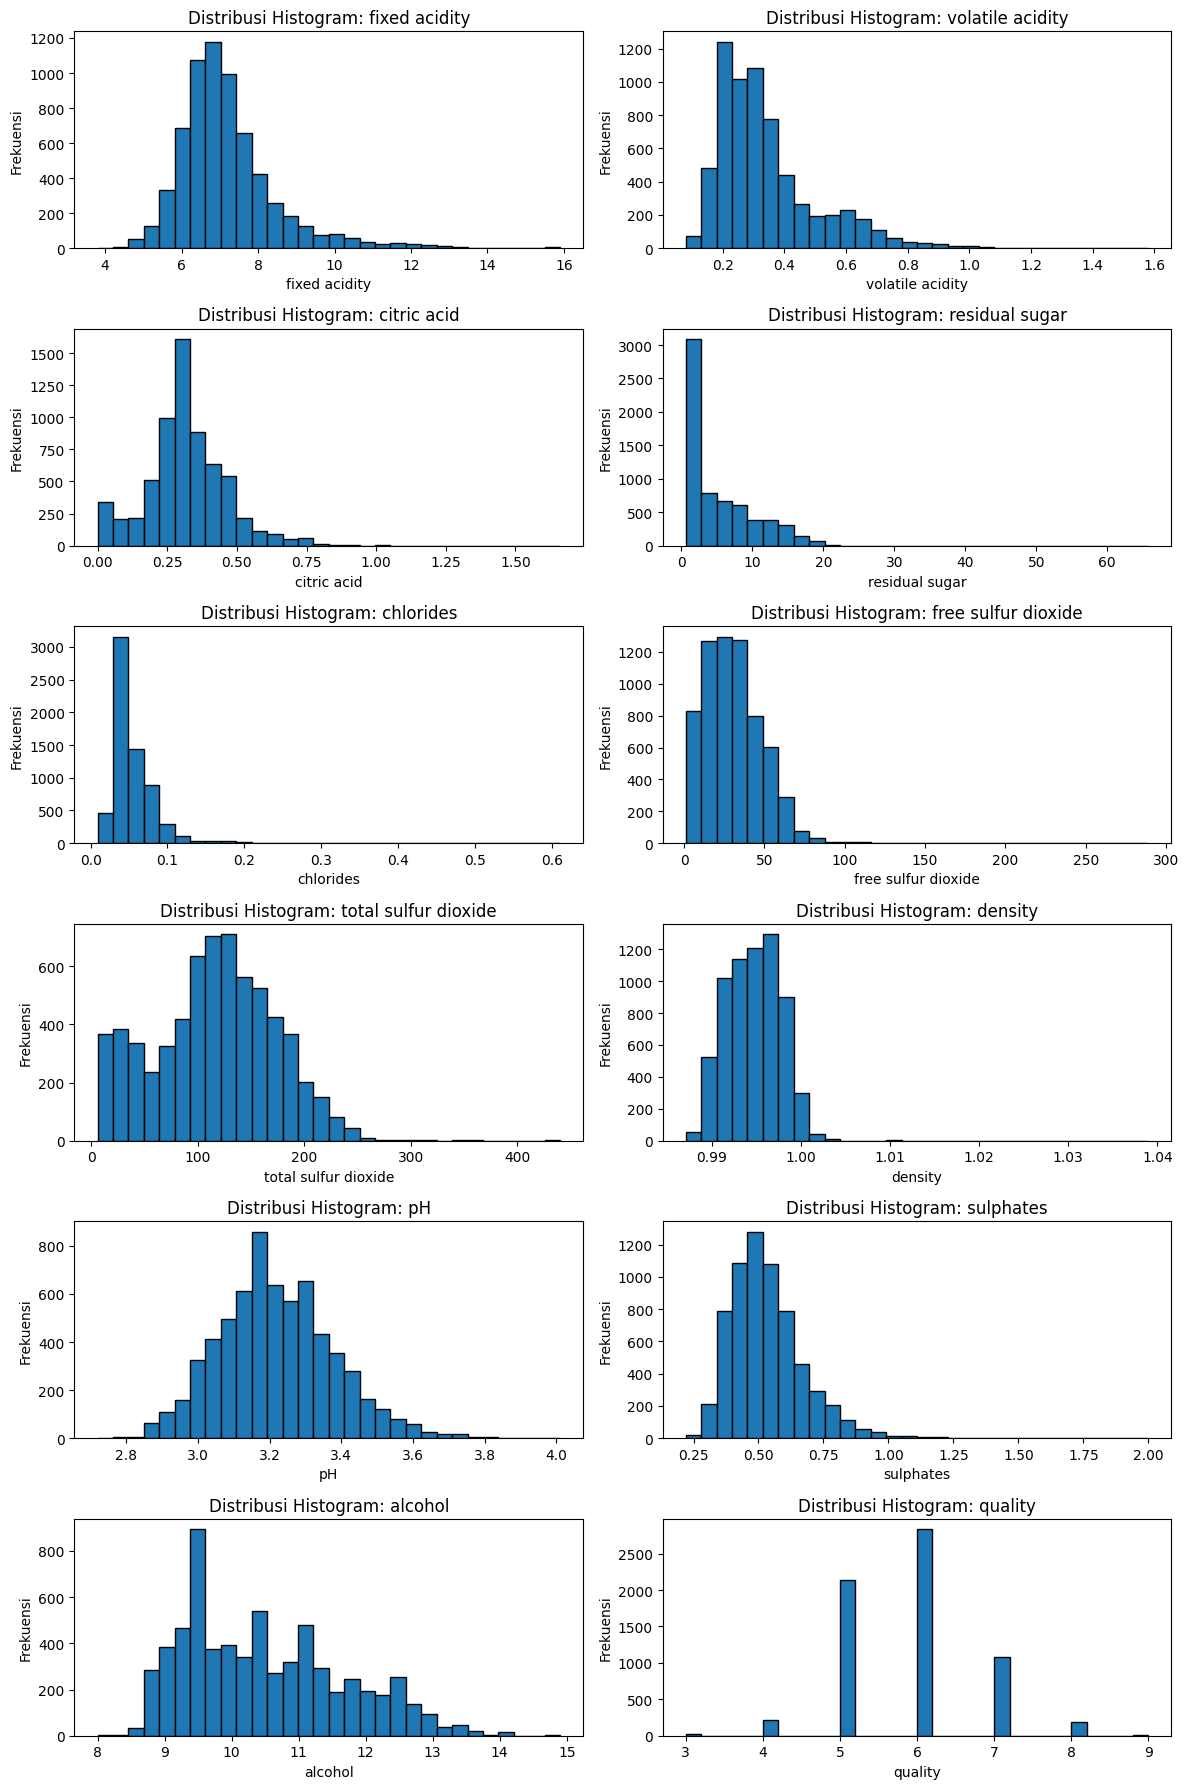

In [7]:
n = len(numerical_cols)
cols = 2  # jumlah kolom
rows = (n + cols - 1) // cols  # hitung baris supaya cukup

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))
axes = axes.flatten()  # supaya mudah indexing

for i, col in enumerate(numerical_cols):
    axes[i].hist(vinho_verde[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f'Distribusi Histogram: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Hilangkan axes kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Hasil dari histogram di atas menunjukkan:

1. `Fixed Acidity`-> cenderung normal dengan puncak frekuensi sekitar 6-7.
2. `Volatile Acidity` -> Distribusinya miring ke kanan, dengan nilai mayoritas volatile acidity rendah, sekitar 0.2-0.4, dan ada beberapa nilai tinggi yang jarang.
3. `Citric Acid` -> Sebagian besar nilai rendah, sekitar 0.2-0.4, dengan distribusi miring ke kanan dan banyak nilai kecil mendekati nol.
4. `Residual Sugar`-> didominasi oleh angka rendah (0-10), tapi ada beberapa nilai outlier yang cukup tinggi (hingga sekitar 60).
5. `Chlorides`-> sangat terkonsentrasi di bawah 0.1 dengan puncak frekuensi sangat tinggi pada nilai rendah.
6. `Free Sulfur Dioxide`-> berada di kisaran 10-50, dengan frekuensi menurun untuk nilai yang lebih tinggi.
7. `Total Sulfur Dioxide` -> relatif lebih merata, tapi tetap banyak nilai yang berkisar 100-200.
8. `Density`-> hampir seragam pada nilai sekitar 0.99-1.0 dengan sedikit variasi, mendekati distribusi normal dengan puncak di sekitar 0.995.
9. `pH` -> mendekati normal dengan nilai puncak sekitar 3.2-3.3.
10. `Sulphates` -> Mayoritas berkisar di 0.4-0.7, dengan distribusi miring ke kanan.
11. `Alcohol` -> tersebar cukup merata antara 9-12, dengan puncak frekuensi sekitar 9-10 dan 11.
12. `Quality` -> Distribusi kualitas anggur menunjukkan nilai paling banyak pada 5 dan 6, dengan sedikit nilai kualitas tinggi (7-8) dan rendah (3-4).

### **Multivariate Analysis**

setelah melakukan analisis pada tiap-tiap variabel selanjutnya akan di lakukan analisis pada 2 atau lebih variabel secara bersamaan (multivariate). pada kode di bawah di gunakan metode korelasi dengan fungsi `corr()` untuk mengecek korelasi dari semua variabel, teknik korelasi yang digunakan adalah pearson. hasil dari korelasinya kemudian di tampilkan dalam bentuk heatmap untuk mempermudah pembacaan.

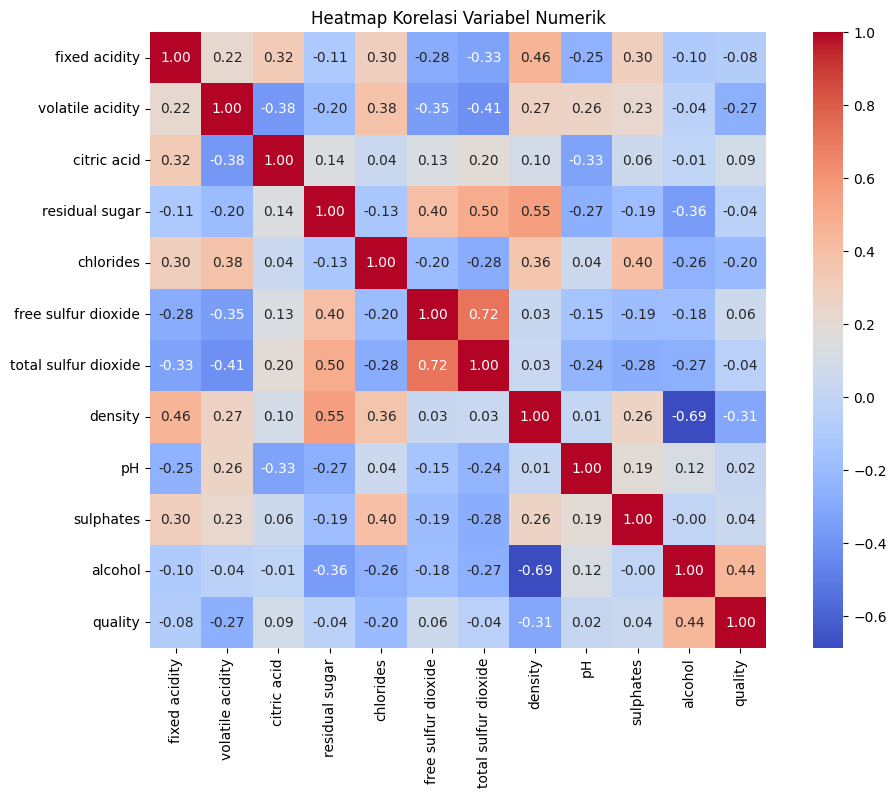

In [8]:
corr = vinho_verde[numerical_cols].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()


dari kode heatmap di atas variabel yang memiliki korelasi tinggi adalah :
1. `residual sugar` dengan `total sulfur dioxide` mencapai `50`
2. `residual sugar` dengan `desnity` mencapai `55`
3. `free sulful dioxode` dengan `toal sulfur dioxide` mencapai `72`
4. `alcohol` dengan `desnity` memiliki hubungan negatif `-69` 

# **Data Preparation**

setelah kita mengetahui struktur pada data dan masalah-masalah yang ada pada data selanjutnya adalah tahap pengolahan data agar siap di gunakan oleh model. secara umum tahap-tahap pada proses ini meliputi: 
1. penghapusan data `NULL`
2. penghapusan data `duplikat`
3. penghapusan `outlier`

### **Remove Missing Values**

untuk memastikan keberadaan missing values atau disebut juga data null, maka digunaan fungsi `isnull()`. missing values pada data dapat menyebabkan bias hingga penurunan akurasi oleh karena itu penanganan missing values sangatlah penting

In [9]:
vinho_verde.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

dari hasil di atas maka terdapat beberapa missing values pada variabel `fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, PH, `dan `sulphates`

untuk menangani missing values ada beberapa metode seperti inputasi atau penghapusan, berhubung missing values pada dataset ini sangatlah kecil sehingga penghapusan tidak akan mempengaruhi jumlah data maka, pengapusan di pilih

In [10]:
vinho_verde = vinho_verde.dropna()

untuk memastikan missing values sudak tidak ada kita mengulangi code sebelumnya

In [11]:
vinho_verde.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

dari hasil output di atas sekarang sudah tidak ada lagi missing values pada semua variabel.

### **Remove Duplicates Values**

setela missing values sudah di hapus selannjutnya di lakukan pengecekan data duplikat, 

In [12]:
vinho_verde.duplicated().sum()

1168

In [13]:
vinho_verde.drop_duplicates(inplace=True)

In [14]:
vinho_verde.duplicated().sum()

0

### **Find Multicollinearity**

In [15]:
def find_correlated_features(corr_matrix, threshold=0.8):
    """Find pairs of highly correlated features"""
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return high_corr_pairs

In [16]:
corr_matrix = vinho_verde[numerical_cols].corr()
high_corr = find_correlated_features(corr_matrix, 0.7)
print(f"\nHighly correlated feature pairs (>0.7):")
for pair in high_corr:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


Highly correlated feature pairs (>0.7):
free sulfur dioxide - total sulfur dioxide: 0.721


### **Feature Engineering**

In [17]:
# 1. Encode categorical variables
vinho_verde_processed = vinho_verde.copy()
vinho_verde_processed['type_encoded'] = vinho_verde_processed['type'].map({'white': 0, 'red': 1})

# 2. Create new features
vinho_verde_processed['total_acidity'] = vinho_verde_processed['fixed acidity'] + vinho_verde_processed['volatile acidity']
vinho_verde_processed['acid_to_sugar_ratio'] = vinho_verde_processed['total_acidity'] / (vinho_verde_processed['residual sugar'] + 1)
vinho_verde_processed['so2_ratio'] = vinho_verde_processed['free sulfur dioxide'] / (vinho_verde_processed['total sulfur dioxide'] + 1)
vinho_verde_processed['density_alcohol_interaction'] = vinho_verde_processed['density'] * vinho_verde_processed['alcohol']

### **Remove Outliers**

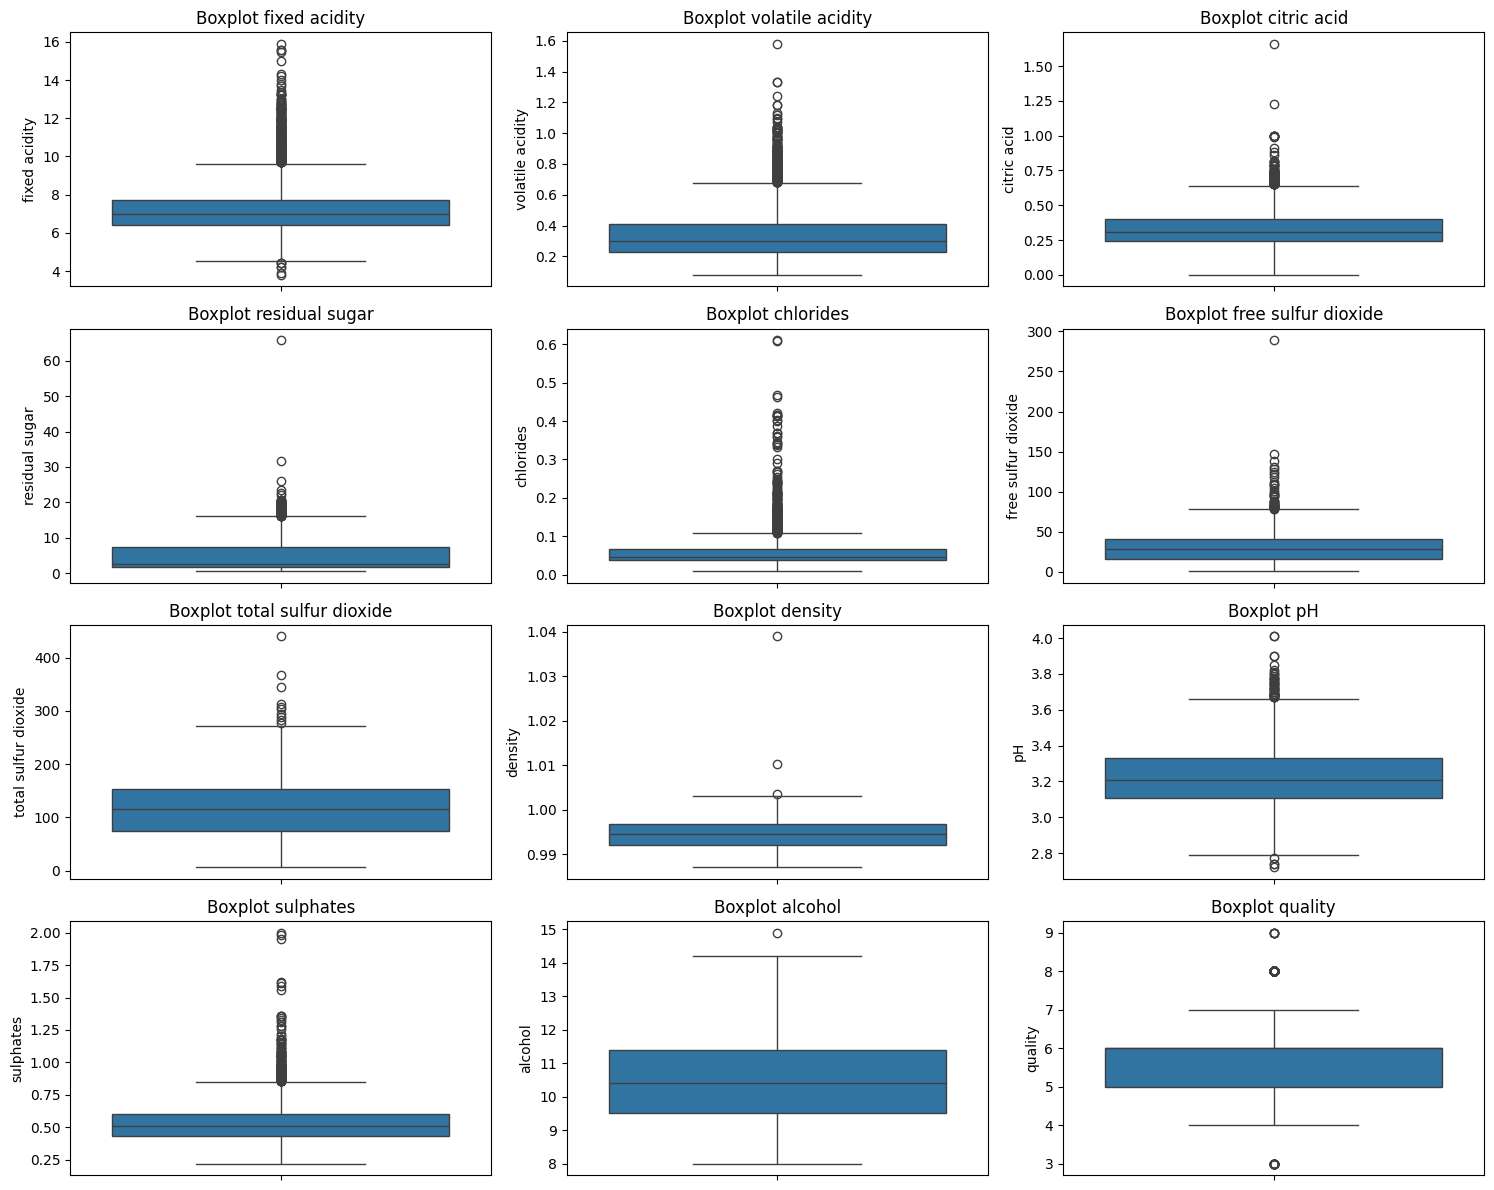

In [18]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=vinho_verde[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


In [19]:
def remove_outliers_iqr(df, columns, factor=2.0):  # Using factor=2.0 instead of 1.5 to be less aggressive
    """Remove outliers using IQR method"""
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        before_count = len(df_clean)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        after_count = len(df_clean)
        print(f"Removed {before_count - after_count} outliers from {col}")

    return df_clean

In [20]:
numerical_features = [col for col in numerical_cols if col != 'quality']
print(f"Shape before outlier removal: {vinho_verde_processed.shape}")
vinho_verde_processed = remove_outliers_iqr(vinho_verde_processed, numerical_features)
print(f"Shape after outlier removal: {vinho_verde_processed.shape}")

Shape before outlier removal: (5295, 18)
Removed 182 outliers from fixed acidity
Removed 157 outliers from volatile acidity
Removed 92 outliers from citric acid
Removed 17 outliers from residual sugar
Removed 174 outliers from chlorides
Removed 20 outliers from free sulfur dioxide
Removed 3 outliers from total sulfur dioxide
Removed 0 outliers from density
Removed 16 outliers from pH
Removed 49 outliers from sulphates
Removed 0 outliers from alcohol
Shape after outlier removal: (4585, 18)


### **Remove High Correlation Feature**

In [21]:
# Prepare features and target
feature_columns = [col for col in vinho_verde_processed.columns if col not in ['quality', 'type']]
X = vinho_verde_processed[feature_columns]
y = vinho_verde_processed['quality']

print(f"Features used: {feature_columns}")

Features used: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type_encoded', 'total_acidity', 'acid_to_sugar_ratio', 'so2_ratio', 'density_alcohol_interaction']


In [22]:
def remove_high_correlation(X, threshold=0.8):
    """Remove highly correlated features"""
    corr_matrix = X.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    print(f"Dropping highly correlated features: {to_drop}")

    return X.drop(columns=to_drop)

In [23]:
X_reduced = remove_high_correlation(X, threshold=0.8)
print(f"Features after correlation removal: {X_reduced.shape[1]}")

Dropping highly correlated features: ['total_acidity', 'acid_to_sugar_ratio', 'density_alcohol_interaction']
Features after correlation removal: 13


In [24]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_reduced, y)


RandomForestClassifier(random_state=42)

In [25]:
feature_importance = pd.DataFrame({
    'feature': X_reduced.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

In [26]:
print(f"\nTop 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
                 feature  importance
10               alcohol    0.114540
7                density    0.098066
12             so2_ratio    0.088112
1       volatile acidity    0.087985
6   total sulfur dioxide    0.081723
9              sulphates    0.078845
4              chlorides    0.078741
3         residual sugar    0.076835
8                     pH    0.076761
5    free sulfur dioxide    0.073802


In [27]:
top_features = feature_importance.head(10)['feature'].tolist()
X_selected = X_reduced[top_features]

print(f"Final feature set: {top_features}")

Final feature set: ['alcohol', 'density', 'so2_ratio', 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'chlorides', 'residual sugar', 'pH', 'free sulfur dioxide']


### **Handling Imbalance Class**

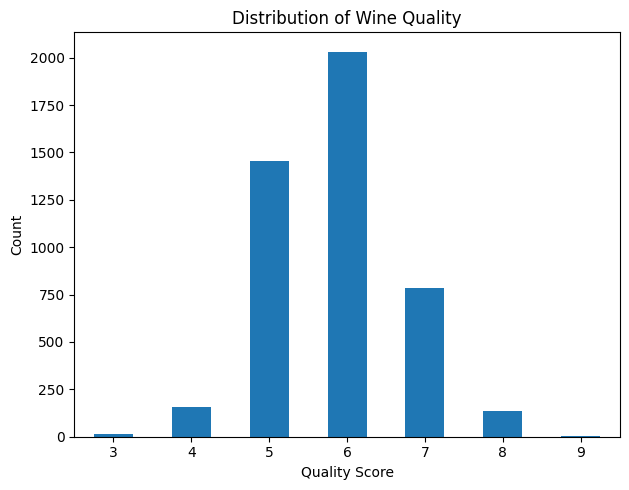

In [28]:
# Visualize target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
y.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [29]:
# Check class distribution
class_distribution = y.value_counts().sort_index()
print(f"Original class distribution:\n{class_distribution}")

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42, k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X_selected, y)

print(f"Balanced class distribution:\n{pd.Series(y_balanced).value_counts().sort_index()}")
print(f"Dataset shape after SMOTE: {X_balanced.shape}")

Original class distribution:
quality
3      13
4     159
5    1456
6    2032
7     784
8     136
9       5
Name: count, dtype: int64
Balanced class distribution:
quality
3    2032
4    2032
5    2032
6    2032
7    2032
8    2032
9    2032
Name: count, dtype: int64
Dataset shape after SMOTE: (14224, 10)


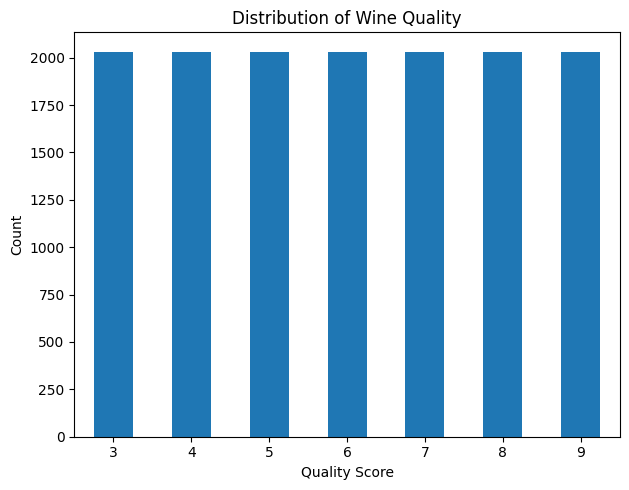

In [30]:
# Visualize target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
y_balanced.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### **Splitting Data**

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (11379, 10)
Test set shape: (2845, 10)


### **Feature Scalling**

In [32]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## **Modeling**

### **Model Selection and Hyperparameter**

In [33]:

models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt']
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [1, 10],
            'kernel': ['rbf'],
            'gamma': ['scale', 0.01]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 9],
            'weights': ['uniform'],
            'metric': ['euclidean']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.1],
            'subsample': [0.9],
            'colsample_bytree': [0.9]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.1],
            'subsample': [0.9]
        }
    }
}

# Train and evaluate models
results = {}
best_models = {}

### **Model Training**

In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

best_models = {}
results = {}

for name, model_info in models.items():
    print(f"\nTraining {name}...")

    random_search = RandomizedSearchCV(
        estimator=model_info['model'],
        param_distributions=model_info['params'],
        n_iter=20,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    if name == 'XGBoost':
        random_search.fit(X_train_scaled, y_train_encoded)
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        f1 = f1_score(y_test_encoded, y_pred, average='weighted')
        cv_scores = cross_val_score(best_model, X_train_scaled, y_train_encoded, cv=cv, scoring='accuracy')
    else:
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

    best_models[name] = best_model
    results[name] = {
        'best_params': random_search.best_params_,
        'test_accuracy': accuracy,
        'f1_score': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }

    print(f"Best parameters: {random_search.best_params_}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



Training Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Test Accuracy: 0.8569
F1 Score: 0.8518
CV Score: 0.8408 (+/- 0.0104)

Training SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Test Accuracy: 0.7880
F1 Score: 0.7798
CV Score: 0.7710 (+/- 0.0130)

Training KNN...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}
Test Accuracy: 0.7831
F1 Score: 0.7653
CV Score: 0.7677 (+/- 0.0098)

Training XGBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Test Accuracy: 0.8401
F1 Score: 0.8359
CV Score: 0.8354 (+/- 0.0054)

Training

## **Evaluation**

In [36]:
# Buat list untuk menyimpan ringkasan hasil evaluasi
summary_list = []

for model_name, metrics in results.items():
    summary_list.append({
        'Model': model_name,
        'Test Accuracy': metrics.get('test_accuracy', None),
        'F1 Score': metrics.get('f1_score', None),
        'CV Mean Accuracy': metrics.get('cv_mean', None),
        'CV Std Dev': metrics.get('cv_std', None)
    })

# Buat dataframe dari list
summary_df = pd.DataFrame(summary_list)

# Urutkan berdasarkan Test Accuracy dari terkecil ke terbesar
summary_df = summary_df.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

print(summary_df)


               Model  Test Accuracy  F1 Score  CV Mean Accuracy  CV Std Dev
0      Random Forest       0.856942  0.851789          0.840759    0.005189
1            XGBoost       0.840070  0.835855          0.835398    0.002704
2  Gradient Boosting       0.839719  0.837465          0.826523    0.002169
3                SVM       0.788049  0.779787          0.770981    0.006519
4                KNN       0.783128  0.765270          0.767730    0.004905


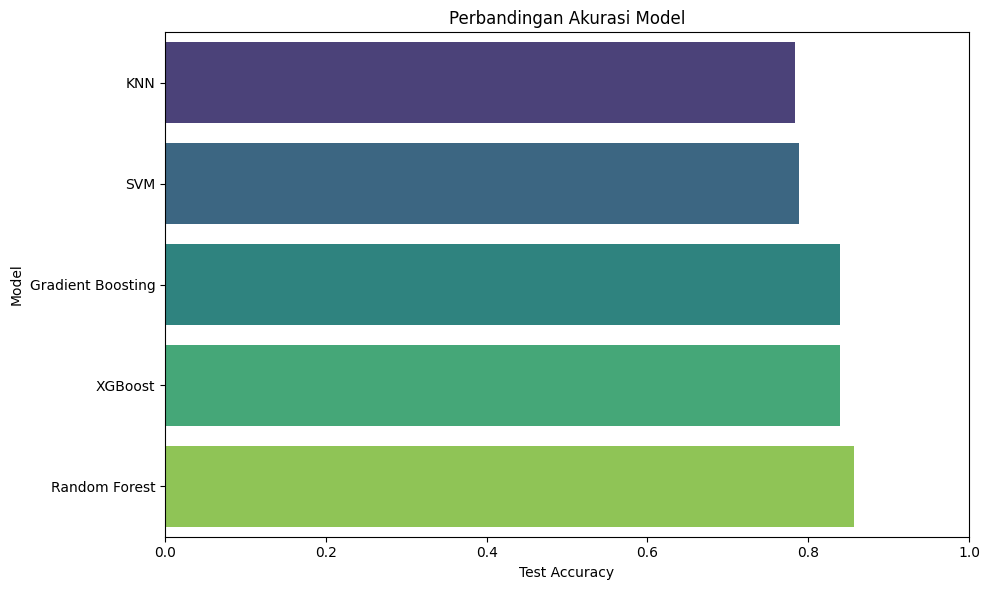

In [ ]:
# Urutkan data berdasarkan akurasi dari terkecil ke terbesar
summary_df_sorted = summary_df.sort_values(by='Test Accuracy', ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Test Accuracy', y='Model', data=summary_df_sorted, palette='viridis')

plt.title('Perbandingan Akurasi Model')
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # rentang akurasi dari 0 sampai 1
plt.tight_layout()
plt.show()
